In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'
dengue_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
dengue_data.head()


,Age,Sex,Month Affected,Duration of fever (days),Current body temperature (°C),White Blood Cell (WBC) Count,Back pain in eyes,Joint pain,Muscle pain,Vomiting,...,Rash,Pleural effusion,Ascites,Bleeding,Slow heart rate,Igg,Igm,NS1,Travelling history,Headache
0,13,Male,May,11,38.2,11257,Low,Medium,High,Low,...,Medium,Medium,Medium,Medium,Medium,Negative,Positive,Positive,Yes,High
1,4,Female,January,8,38.7,9824,Low,Low,High,High,...,Medium,Medium,High,Low,Medium,Negative,Negative,Positive,Yes,High
2,68,Female,October,14,38.9,4731,High,Low,Medium,High,...,High,Low,Medium,Low,Low,Negative,Negative,Negative,Yes,Medium
3,73,Male,July,11,37.8,5055,Medium,High,Medium,High,...,Low,High,High,Medium,High,Positive,Positive,Positive,No,Medium
4,31,Female,April,4,38.4,5755,High,Medium,Medium,Medium,...,Low,Medium,High,Low,High,Negative,Negative,Negative,Yes,Low


In [2]:
# Checking for missing values
dengue_data = dengue_data.dropna()
missing_values = dengue_data.isnull().sum()

# Checking the datatype of each column
data_types = dengue_data.dtypes

# Checking unique values for address to understand its complexity
#unique_addresses = dengue_data['Residence'].nunique()

missing_values, data_types #unique_addresses


(Age                              0
 Sex                              0
 Month Affected                   0
 Duration of fever (days)         0
 Current body temperature (°C)    0
 White Blood Cell (WBC) Count     0
 Back pain in eyes                0
 Joint pain                       0
 Muscle pain                      0
 Vomiting                         0
 Hemoglobin Range                 0
 Hematocrit Range                 0
 Platelets Count                  0
 Shock (Low/Medium/High)          0
 Rash                             0
 Pleural effusion                 0
 Ascites                          0
 Bleeding                         0
 Slow heart rate                  0
 Igg                              0
 Igm                              0
 NS1                              0
 Travelling history               0
 Headache                         0
 dtype: int64,
 Age                                int64
 Sex                               object
 Month Affected                    ob

In [3]:
# Dropping the 'Residence' column for the analysis
dengue_data_cleaned = dengue_data

# Summary statistics for numerical columns
numerical_summary = dengue_data_cleaned.describe()

# Frequency distribution for categorical columns
categorical_columns = dengue_data_cleaned.select_dtypes(include=['object']).columns
categorical_summary = dengue_data_cleaned[categorical_columns].apply(pd.value_counts)

numerical_summary, categorical_summary.T.head()  # Displaying the head of the categorical summary for brevity


(              Age  Duration of fever (days)  Current body temperature (°C)  \
 count  300.000000                 300.00000                     300.000000   
 mean    48.100000                   7.91000                      38.336333   
 std     28.702662                   4.20088                       0.987165   
 min      1.000000                   1.00000                      36.500000   
 25%     21.750000                   5.00000                      37.500000   
 50%     46.500000                   8.00000                      38.300000   
 75%     73.000000                  12.00000                      39.200000   
 max     98.000000                  15.00000                      40.000000   
 
        White Blood Cell (WBC) Count  Platelets Count  
 count                    300.000000       300.000000  
 mean                    7443.440000    125566.206667  
 std                     2639.825925     42221.189993  
 min                     3084.000000     50046.000000  
 25%   

In [4]:
dengue_data.columns

Index(['Age', 'Sex', 'Month Affected', 'Duration of fever (days)',
       'Current body temperature (°C)', 'White Blood Cell (WBC) Count',
       'Back pain in eyes', 'Joint pain', 'Muscle pain', 'Vomiting',
       'Hemoglobin Range', 'Hematocrit Range', 'Platelets Count',
       'Shock (Low/Medium/High)', 'Rash', 'Pleural effusion', 'Ascites',
       'Bleeding', 'Slow heart rate', 'Igg', 'Igm', 'NS1',
       'Travelling history', 'Headache'],
      dtype='object')

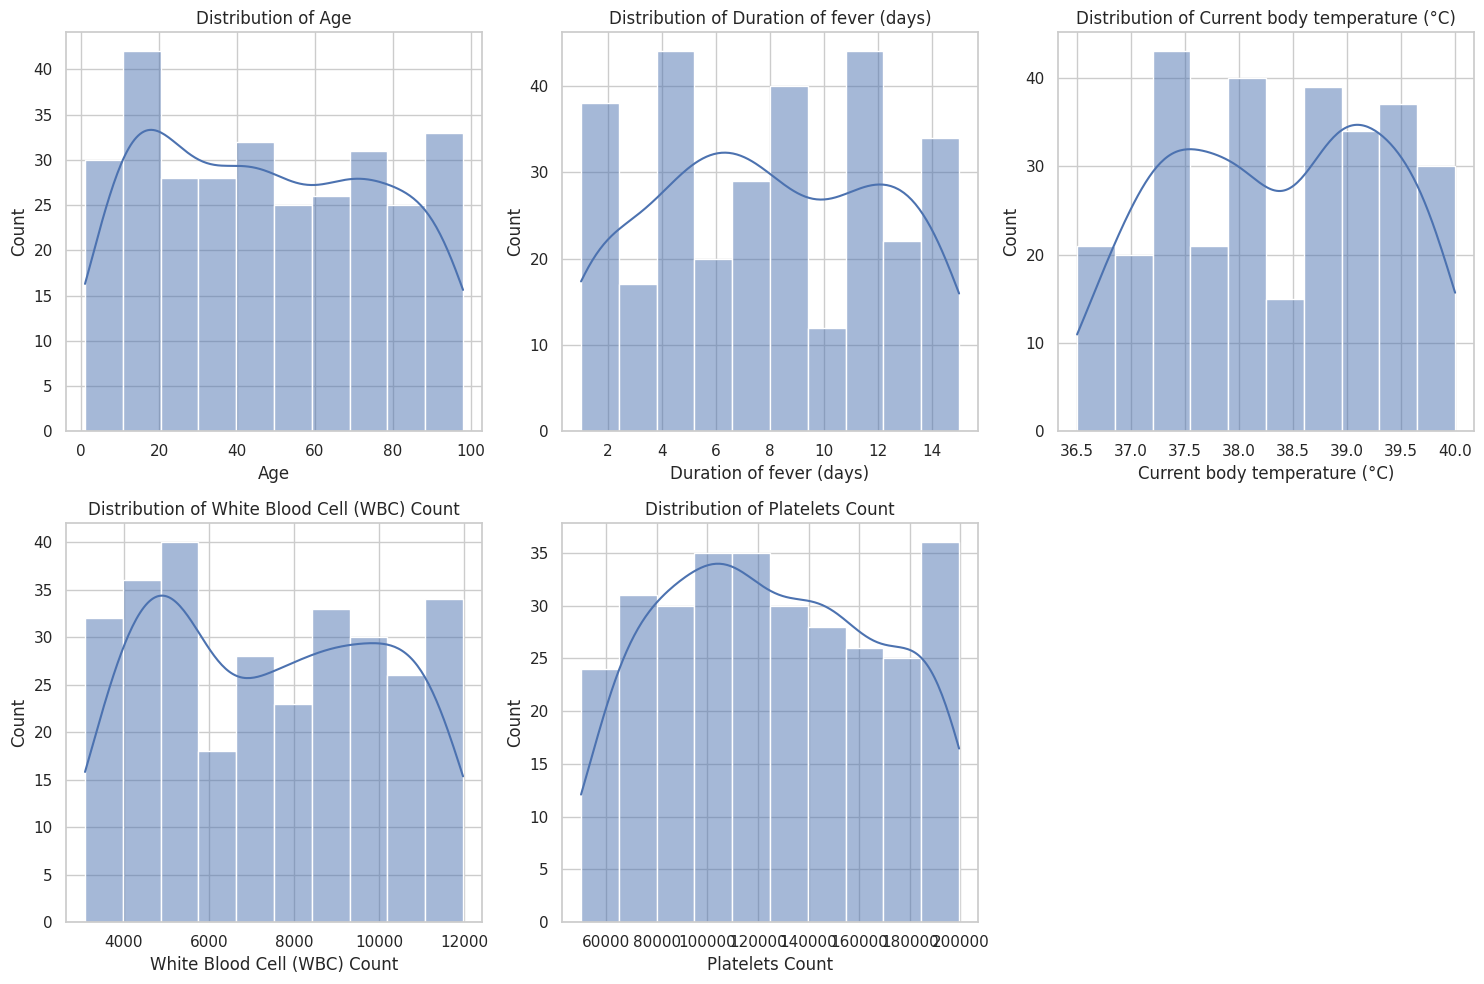

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Histograms for numerical variables
numerical_variables = ['Age', 'Duration of fever (days)', 'Current body temperature (°C)',
                       'White Blood Cell (WBC) Count', 'Platelets Count']

plt.figure(figsize=(15, 10))
for i, variable in enumerate(numerical_variables):
    plt.subplot(2, 3, i+1)
    sns.histplot(dengue_data_cleaned[variable], kde=True)
    plt.title(f'Distribution of {variable}')
    plt.tight_layout()

plt.show()


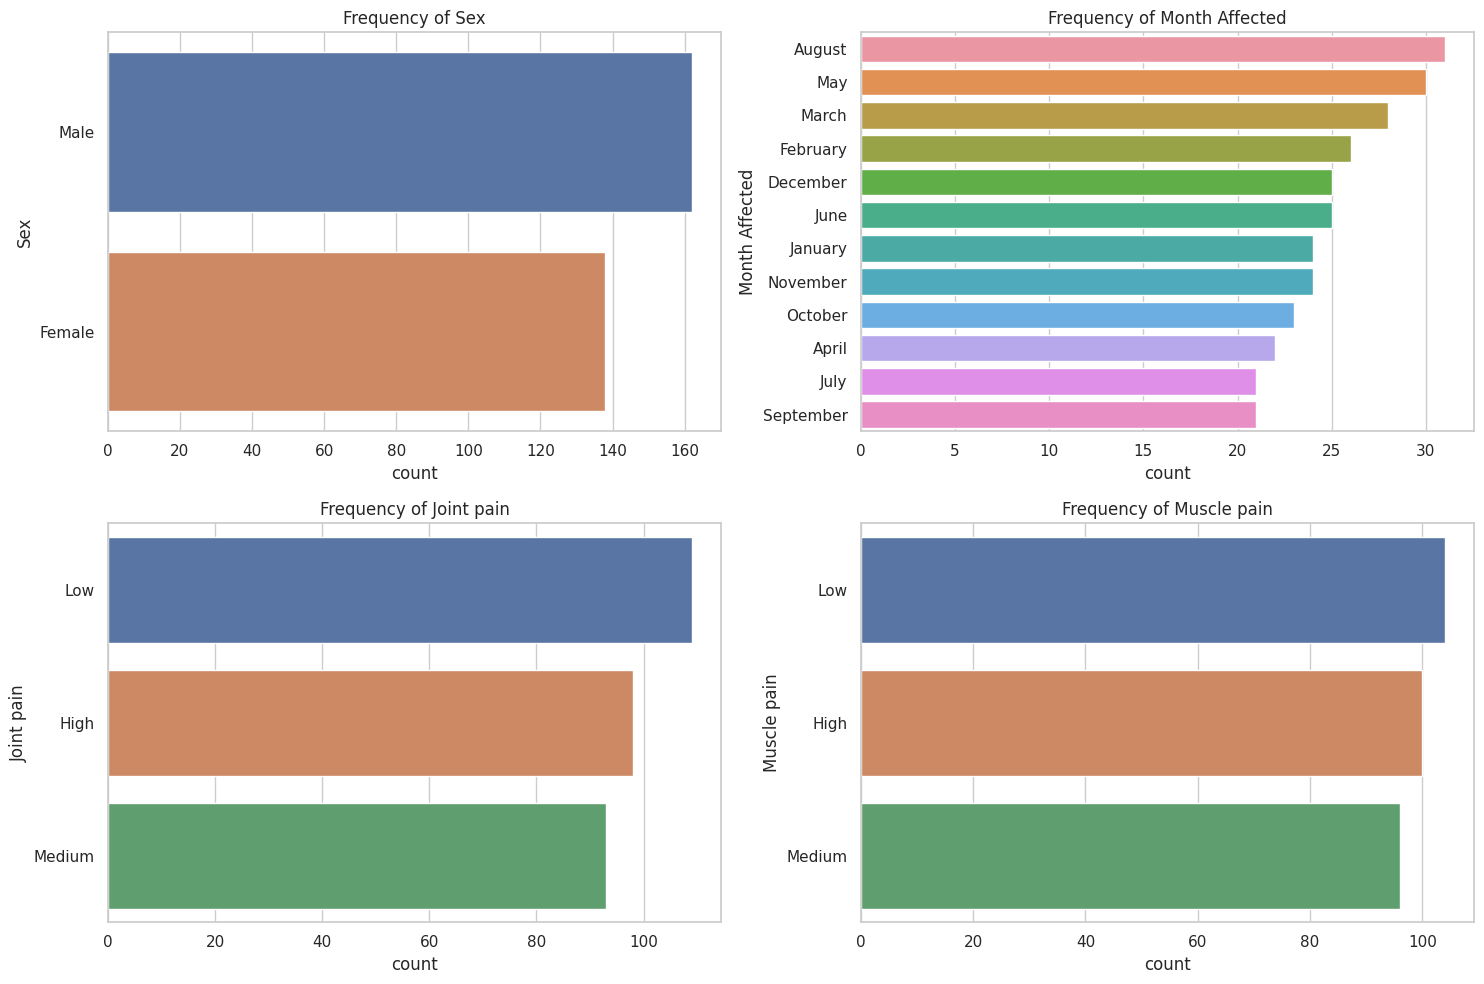

In [6]:
# Bar charts for selected categorical variables
categorical_variables = ['Sex', 'Month Affected', 'Joint pain', 'Muscle pain']

plt.figure(figsize=(15, 10))
for i, variable in enumerate(categorical_variables):
    plt.subplot(2, 2, i+1)
    sns.countplot(y=dengue_data_cleaned[variable], order = dengue_data_cleaned[variable].value_counts().index)
    plt.title(f'Frequency of {variable}')
    plt.tight_layout()

plt.show()


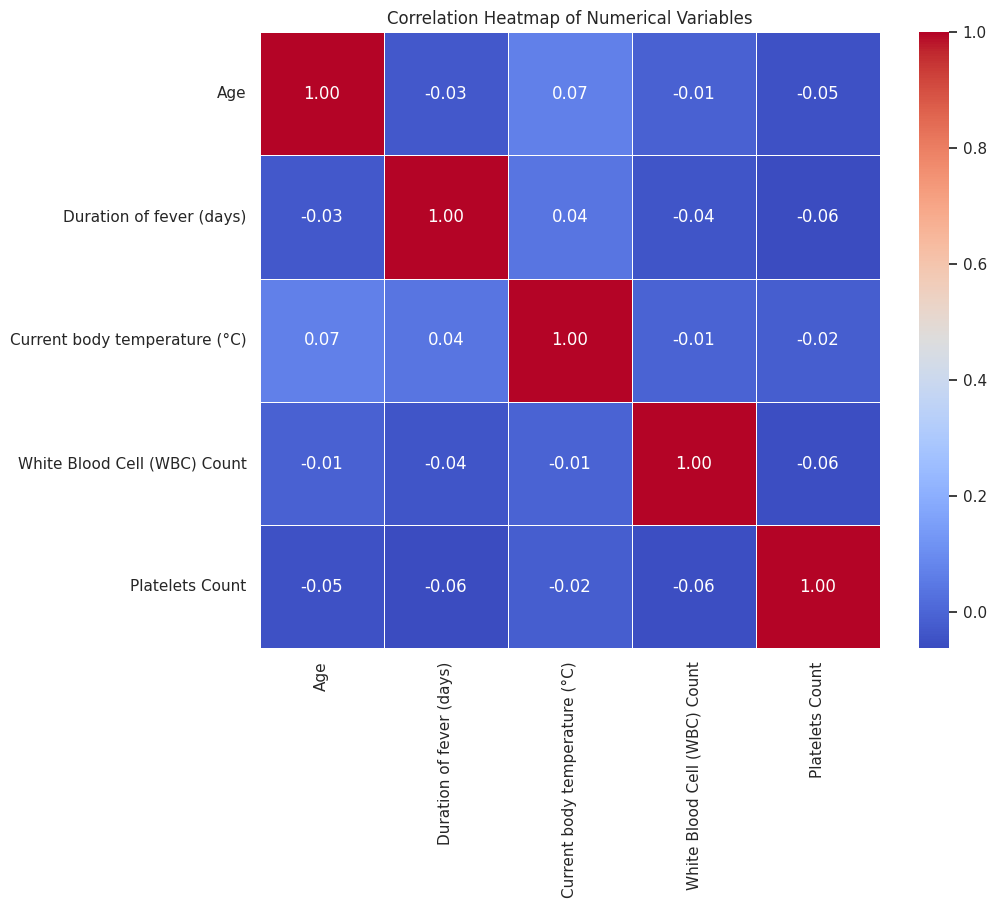

In [7]:
# Correlation heatmap for numerical variables
correlation_matrix = dengue_data_cleaned[numerical_variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Feature and target selection
features = dengue_data_cleaned.drop(columns=['NS1'])
target = dengue_data_cleaned['NS1']

# Identifying numerical and categorical columns
numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

# Creating transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# ColumnTransformer to apply transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Creating a preprocessing and modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Applying transformations
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Checking the shape of the transformed features
X_train_transformed.shape, X_test_transformed.shape


((240, 318), (60, 318))

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Creating and training the Random Forest model
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train_transformed, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test_transformed)

# Evaluating the model
classification_metrics = classification_report(y_test, y_pred)

print(classification_metrics)


              precision    recall  f1-score   support

    Negative       0.57      0.88      0.69        32
    Positive       0.64      0.25      0.36        28

    accuracy                           0.58        60
   macro avg       0.60      0.56      0.53        60
weighted avg       0.60      0.58      0.54        60



In [10]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train_transformed, y_train)

# Best parameters
best_params = grid_search.best_params_
best_params


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

In [11]:
# Retraining the model with the best parameters
optimized_rf_classifier = RandomForestClassifier(**best_params, random_state=0)
optimized_rf_classifier.fit(X_train_transformed, y_train)

# Predicting on the test set with the optimized model
optimized_y_pred = optimized_rf_classifier.predict(X_test_transformed)

# Evaluating the optimized model
optimized_classification_metrics = classification_report(y_test, optimized_y_pred)

print(optimized_classification_metrics)


              precision    recall  f1-score   support

    Negative       0.58      0.94      0.71        32
    Positive       0.75      0.21      0.33        28

    accuracy                           0.60        60
   macro avg       0.66      0.58      0.52        60
weighted avg       0.66      0.60      0.54        60



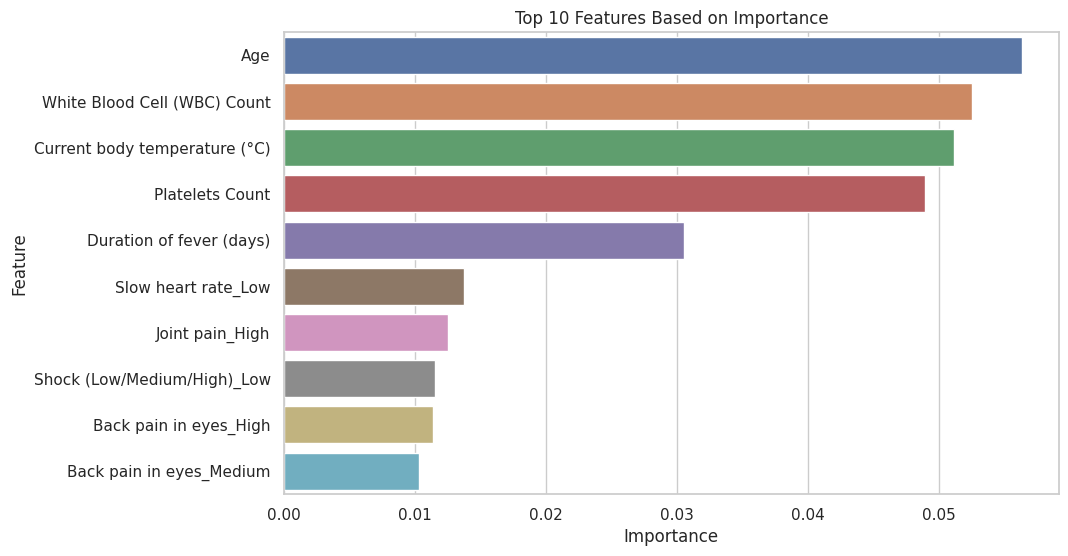

In [12]:
# Extracting feature importances
feature_importances = optimized_rf_classifier.feature_importances_

# Getting feature names after one-hot encoding
encoded_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)
all_feature_names = list(numerical_cols) + list(encoded_feature_names)

# Creating a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sorting the features by importance
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance.head(10))
plt.title('Top 10 Features Based on Importance')
plt.show()


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Creating and training the Gradient Boosting model
gb_classifier = GradientBoostingClassifier(random_state=0)
gb_classifier.fit(X_train_transformed, y_train)

# Predicting on the test set with the Gradient Boosting model
gb_y_pred = gb_classifier.predict(X_test_transformed)

# Evaluating the Gradient Boosting model
gb_classification_metrics = classification_report(y_test, gb_y_pred)

print(gb_classification_metrics)


              precision    recall  f1-score   support

    Negative       0.55      0.75      0.63        32
    Positive       0.50      0.29      0.36        28

    accuracy                           0.53        60
   macro avg       0.52      0.52      0.50        60
weighted avg       0.52      0.53      0.51        60



In [14]:
# Re-importing necessary libraries and reloading the data since the code execution state was reset
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Reload the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'
dengue_data = pd.read_csv(file_path)

# Preprocess the data as before
# Dropping the 'Residence' column for the analysis
dengue_data_cleaned = dengue_data
# Feature and target selection
features = dengue_data_cleaned.drop(columns=['NS1'])
target = dengue_data_cleaned['NS1']

# Identifying numerical and categorical columns
numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

# Creating transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# ColumnTransformer to apply transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Creating a preprocessing and modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Applying transformations
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Creating and evaluating the Gradient Boosting Classifier with cross-validation
gb_classifier = GradientBoostingClassifier(random_state=0)
cv_scores = cross_val_score(gb_classifier, X_train_transformed, y_train, cv=5, scoring='accuracy')
average_cv_score = cv_scores.mean()

average_cv_score


0.5541666666666667

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Applying SMOTE to the training data
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)

# Retraining the Gradient Boosting Classifier on the SMOTE-transformed data
gb_classifier_smote = GradientBoostingClassifier(random_state=0)
gb_classifier_smote.fit(X_train_smote, y_train_smote)

# Predicting on the test set
y_pred_smote = gb_classifier_smote.predict(X_test_transformed)

# Evaluating the model
classification_metrics_smote = classification_report(y_test, y_pred_smote)

print(classification_metrics_smote)


              precision    recall  f1-score   support

    Negative       0.67      0.75      0.71        32
    Positive       0.67      0.57      0.62        28

    accuracy                           0.67        60
   macro avg       0.67      0.66      0.66        60
weighted avg       0.67      0.67      0.66        60



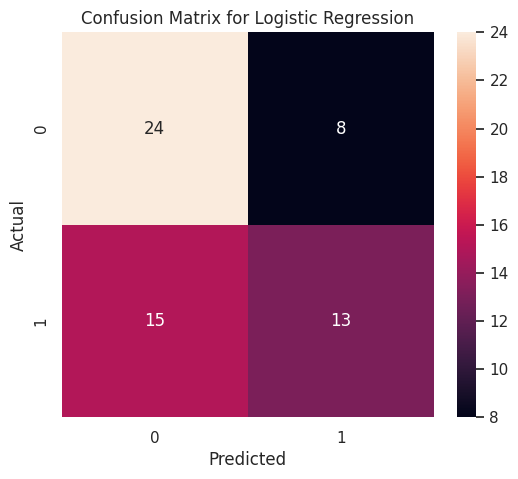

              precision    recall  f1-score   support

    Negative       0.62      0.75      0.68        32
    Positive       0.62      0.46      0.53        28

    accuracy                           0.62        60
   macro avg       0.62      0.61      0.60        60
weighted avg       0.62      0.62      0.61        60



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

# Function to train a model and visualize its performance
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Training the model
    model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = model.predict(X_test)

    # Calculating accuracy and other metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Visualizing the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return accuracy, report

# 1. Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_accuracy, logistic_report = train_and_evaluate_model(logistic_model, X_train_transformed, X_test_transformed, y_train, y_test, "Logistic Regression")

logistic_accuracy,
print(logistic_report)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return report, conf_matrix

# Initializing models
logistic_model = LogisticRegression(max_iter=1000, random_state=0)
decision_tree_model = RandomForestClassifier(random_state=0)
random_forest_model = RandomForestClassifier(random_state=0)
svc_model = GradientBoostingClassifier(random_state=0)

# Training and evaluating Logistic Regression
logistic_report, logistic_conf_matrix = train_evaluate_model(logistic_model, X_train_transformed, X_test_transformed, y_train, y_test)

print(logistic_report)

              precision    recall  f1-score   support

    Negative       0.62      0.75      0.68        32
    Positive       0.62      0.46      0.53        28

    accuracy                           0.62        60
   macro avg       0.62      0.61      0.60        60
weighted avg       0.62      0.62      0.61        60



In [18]:
logistic_conf_matrix

array([[24,  8],
       [15, 13]])

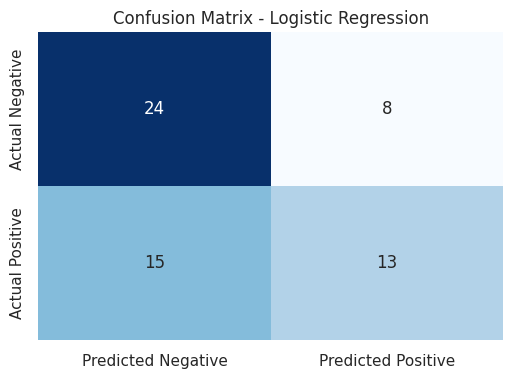

In [19]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(title)
    plt.show()

# Plotting confusion matrix for Logistic Regression
plot_confusion_matrix(logistic_conf_matrix, title='Confusion Matrix - Logistic Regression')


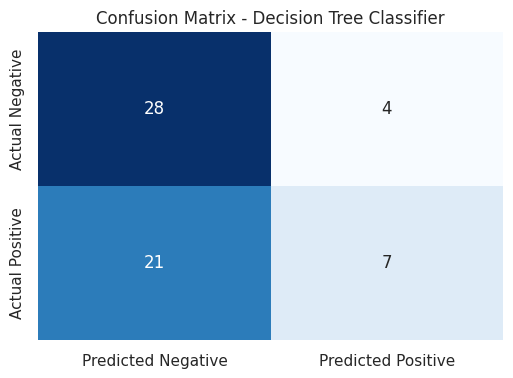

              precision    recall  f1-score   support

    Negative       0.57      0.88      0.69        32
    Positive       0.64      0.25      0.36        28

    accuracy                           0.58        60
   macro avg       0.60      0.56      0.53        60
weighted avg       0.60      0.58      0.54        60



In [20]:
# Training and evaluating Decision Tree Classifier
decision_tree_report, decision_tree_conf_matrix = train_evaluate_model(decision_tree_model, X_train_transformed, X_test_transformed, y_train, y_test)

# Visualizing the results for Decision Tree
plot_confusion_matrix(decision_tree_conf_matrix, title='Confusion Matrix - Decision Tree Classifier')

print(decision_tree_report)


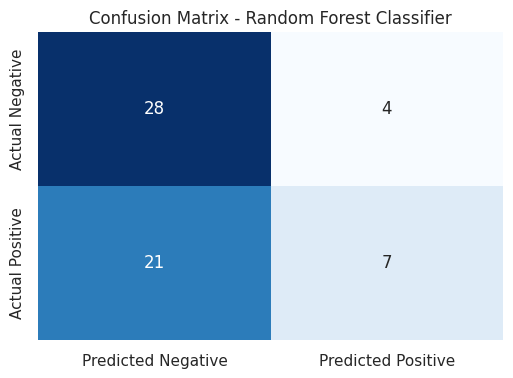

              precision    recall  f1-score   support

    Negative       0.57      0.88      0.69        32
    Positive       0.64      0.25      0.36        28

    accuracy                           0.58        60
   macro avg       0.60      0.56      0.53        60
weighted avg       0.60      0.58      0.54        60



In [21]:
# Training and evaluating Random Forest Classifier
random_forest_report, random_forest_conf_matrix = train_evaluate_model(random_forest_model, X_train_transformed, X_test_transformed, y_train, y_test)

# Visualizing the results for Random Forest
plot_confusion_matrix(random_forest_conf_matrix, title='Confusion Matrix - Random Forest Classifier')

print(random_forest_report)


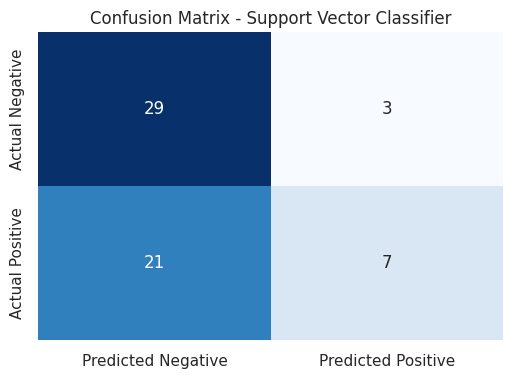

              precision    recall  f1-score   support

    Negative       0.58      0.91      0.71        32
    Positive       0.70      0.25      0.37        28

    accuracy                           0.60        60
   macro avg       0.64      0.58      0.54        60
weighted avg       0.64      0.60      0.55        60



In [22]:
from sklearn.svm import SVC

# Initializing SVC model
svc_model = SVC(random_state=0)

# Training and evaluating Support Vector Classifier
svc_report, svc_conf_matrix = train_evaluate_model(svc_model, X_train_transformed, X_test_transformed, y_train, y_test)

# Visualizing the results for SVC
plot_confusion_matrix(svc_conf_matrix, title='Confusion Matrix - Support Vector Classifier')

print(svc_report)


In [23]:
# from lightgbm import LGBMClassifier

# # Initializing the LightGBM Classifier
# lgbm_model = LGBMClassifier(random_state=0)

# # Training and evaluating LightGBM Classifier
# lgbm_report, lgbm_conf_matrix = train_evaluate_model(lgbm_model, X_train_transformed, X_test_transformed, y_train_encoded, y_test_encoded)

# # Visualizing the results for LightGBM
# plot_confusion_matrix(lgbm_conf_matrix, title='Confusion Matrix - LightGBM Classifier')

# print(lgbm_report)

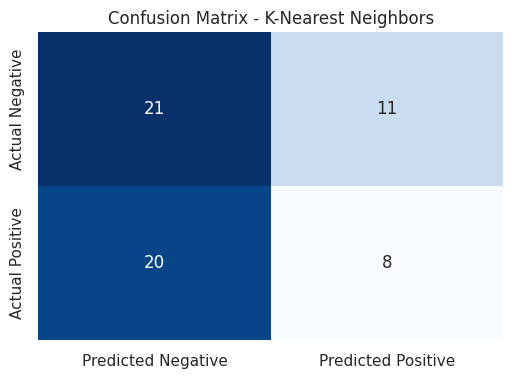

              precision    recall  f1-score   support

    Negative       0.51      0.66      0.58        32
    Positive       0.42      0.29      0.34        28

    accuracy                           0.48        60
   macro avg       0.47      0.47      0.46        60
weighted avg       0.47      0.48      0.47        60



In [24]:
# Re-importing necessary libraries and reloading the data since the code execution state was reset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'
dengue_data = pd.read_csv(file_path)

# Preprocess the data as before
dengue_data_cleaned = dengue_data
features = dengue_data_cleaned.drop(columns=['NS1'])
target = dengue_data_cleaned['NS1']

numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return report, conf_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(title)
    plt.show()

# Initializing and evaluating KNN
knn_model = KNeighborsClassifier()
knn_report, knn_conf_matrix = train_evaluate_model(knn_model, X_train_transformed, X_test_transformed, y_train, y_test)

# Visualizing results for KNN
plot_confusion_matrix(knn_conf_matrix, title='Confusion Matrix - K-Nearest Neighbors')
print(knn_report)


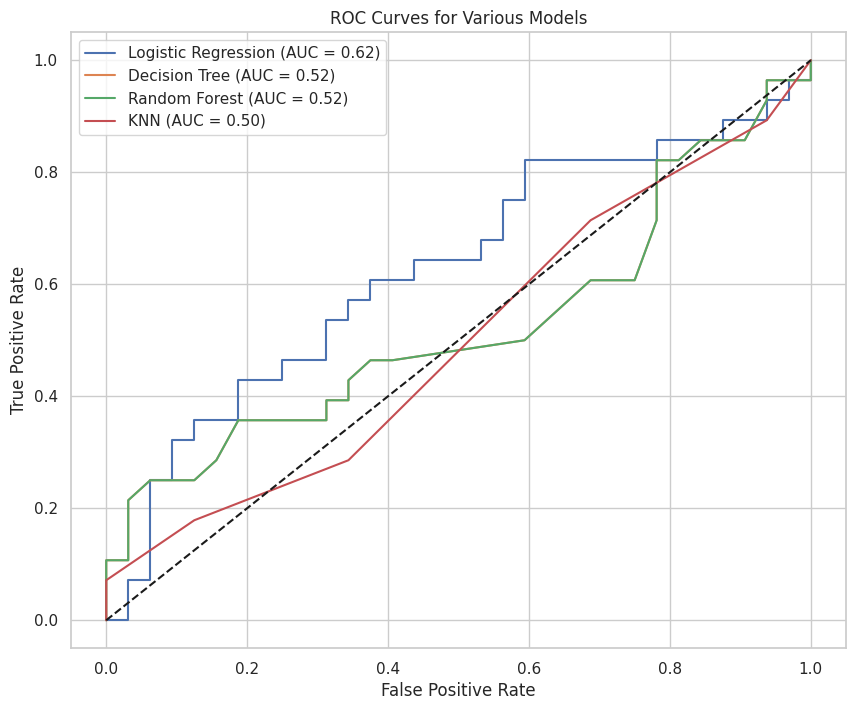

In [25]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarizing the labels for ROC curve calculation
y_test_binarized = label_binarize(y_test, classes=['Negative', 'Positive']).ravel()

# Function to calculate ROC AUC
def compute_roc_auc(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Computing ROC AUC for each model
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "KNN": knn_model
}

roc_results = {}
for name, model in models.items():
    if name != "Linear SVC":  # Linear SVC does not support 'predict_proba'
        model.probability = True  # Enable probability for models
        fpr, tpr, roc_auc = compute_roc_auc(model, X_test_transformed, y_test_binarized)
        roc_results[name] = (fpr, tpr, roc_auc)

# Plotting ROC curves
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_results.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Models')
plt.legend()
plt.show()


In [26]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score, f1_score
# from sklearn.pipeline import Pipeline
# from sklearn.base import TransformerMixin

# # Custom transformer to convert sparse matrix to dense
# class DenseTransformer(TransformerMixin):
#     def fit(self, X, y=None, **fit_params):
#         return self

#     def transform(self, X, y=None, **fit_params):
#         return X.toarray()

# # Load the dataset
# file_path = '/kaggle/input/dengue-datasets/dengue_dataset.csv'  # Replace with your file path
# dengue_data = pd.read_csv(file_path)

# # Drop 'Residence' for this analysis
# dengue_data_cleaned = dengue_data.drop(columns=['Residence'])

# # Feature and target selection
# features = dengue_data_cleaned.drop(columns=['NS1'])
# target = dengue_data_cleaned['NS1']

# # Identifying numerical and categorical columns
# numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
# categorical_cols = features.select_dtypes(include=['object']).columns

# # Creating transformers for numerical and categorical columns
# numerical_transformer = StandardScaler()
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# # ColumnTransformer to apply transformations to the correct columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ])

# # Creating a pipeline with preprocessing, dense transformation, and the GaussianNB model
# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('to_dense', DenseTransformer()),
#                            ('model', GaussianNB())])

# # Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# # Training the GaussianNB model
# pipeline.fit(X_train, y_train)

# # Evaluating the model
# y_pred = pipeline.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='macro')

# print("Accuracy:", accuracy)
# print("F1 Score:", f1)


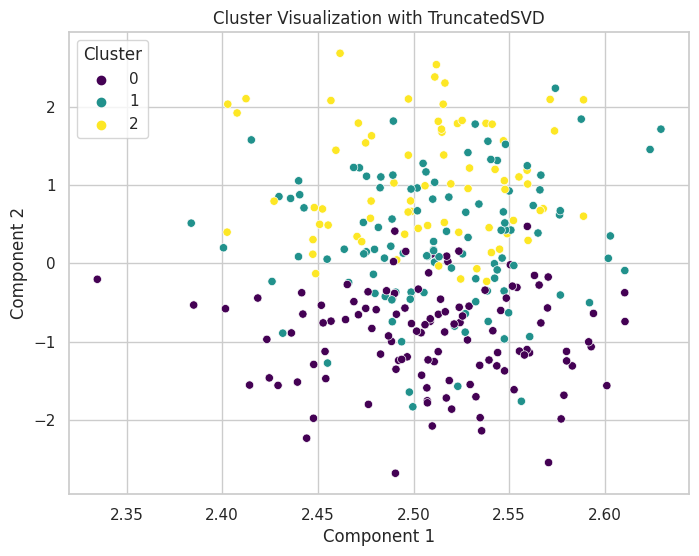

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

# Load the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'  # Replace with your file path
dengue_data = pd.read_csv(file_path)

# Drop 'Residence' for this analysis
dengue_data_cleaned = dengue_data

# Identifying numerical and categorical columns
numerical_cols = dengue_data_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = dengue_data_cleaned.select_dtypes(include=['object']).columns

# Creating transformers for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Preprocessing the data
X_processed = preprocessor.fit_transform(dengue_data_cleaned)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Change number of clusters if needed
clusters = kmeans.fit_predict(X_processed)

# Reducing dimensions for visualization (using TruncatedSVD)
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_processed)

# Creating a DataFrame for the SVD components
svd_df = pd.DataFrame(X_svd, columns=['Component 1', 'Component 2'])
svd_df['Cluster'] = clusters

# Plotting the clusters using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=svd_df, x='Component 1', y='Component 2', hue='Cluster', palette='viridis')
plt.title('Cluster Visualization with TruncatedSVD')
plt.show()


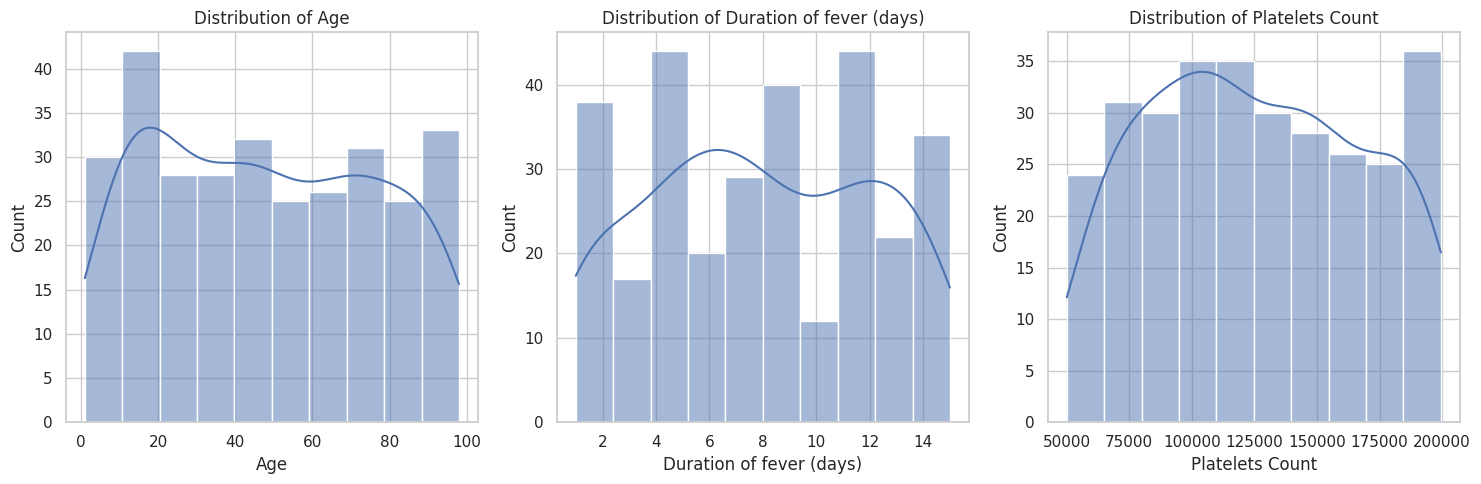

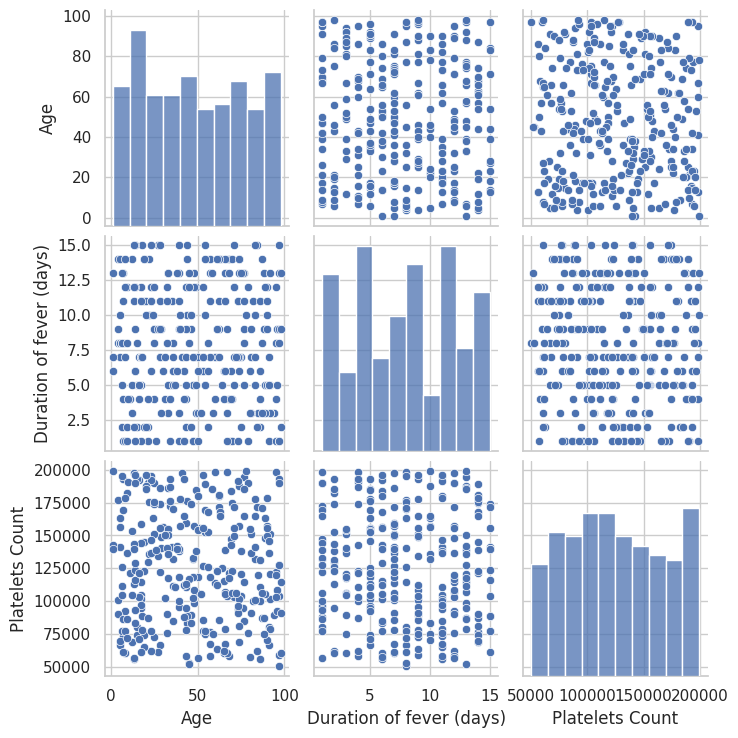

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'  # Replace with your file path
dengue_data = pd.read_csv(file_path)

# Feature distribution visualizations
numerical_features = ['Age', 'Duration of fever (days)', 'Platelets Count']  # Add or modify as needed

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i+1)
    sns.histplot(dengue_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Pair plot
sns.pairplot(dengue_data[numerical_features])
plt.show()


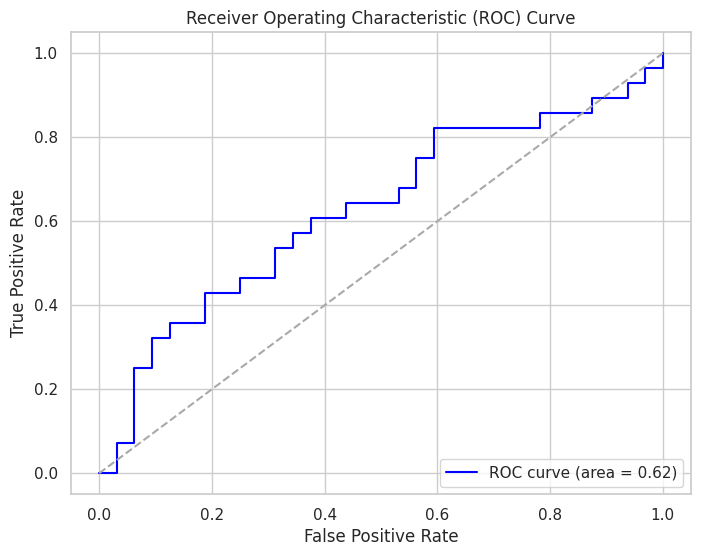

Accuracy: 0.6166666666666667
Precision: 0.6190476190476191
Recall: 0.4642857142857143
F1 Score: 0.5306122448979592
Matthews Correlation Coefficient: 0.22413272587221034


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'  # Replace with your file path
dengue_data = pd.read_csv(file_path)

# Preprocessing
# Assuming 'Residence' is dropped and 'NS1' is the target
features = dengue_data.drop(columns=['NS1'])
target = dengue_data['NS1']

numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(features)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, target, test_size=0.2, random_state=0)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')  # Adjust pos_label if needed
recall = recall_score(y_test, y_pred, pos_label='Positive')
f1 = f1_score(y_test, y_pred, pos_label='Positive')
mcc = matthews_corrcoef(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Positive')
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Printing Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)


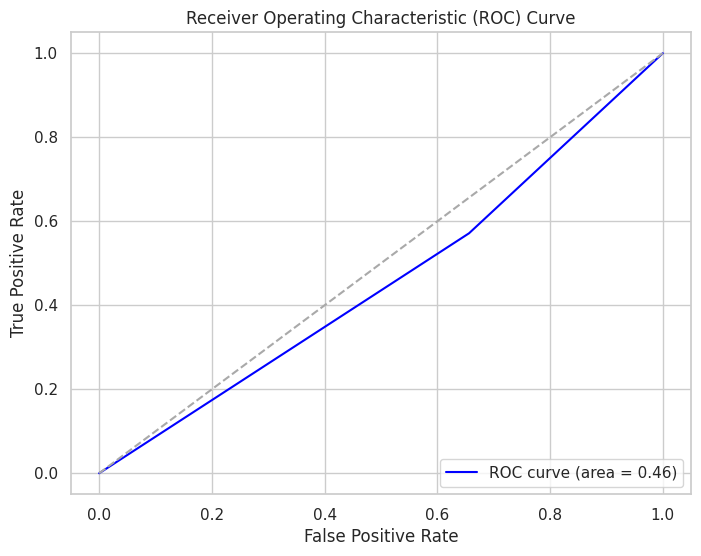

Accuracy: 0.45
Precision: 0.43243243243243246
Recall: 0.5714285714285714
F1 Score: 0.49230769230769234
Matthews Correlation Coefficient: -0.08703517510499124


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'  # Replace with your file path
dengue_data = pd.read_csv(file_path)

# Preprocessing
features = dengue_data.drop(columns=['NS1'])
target = dengue_data['NS1']

numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False), categorical_cols)  # Ensure dense output
    ])

X_processed = preprocessor.fit_transform(features)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, target, test_size=0.2, random_state=0)

# Train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')  # Adjust pos_label if needed
recall = recall_score(y_test, y_pred, pos_label='Positive')
f1 = f1_score(y_test, y_pred, pos_label='Positive')
mcc = matthews_corrcoef(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Positive')
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Printing Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)


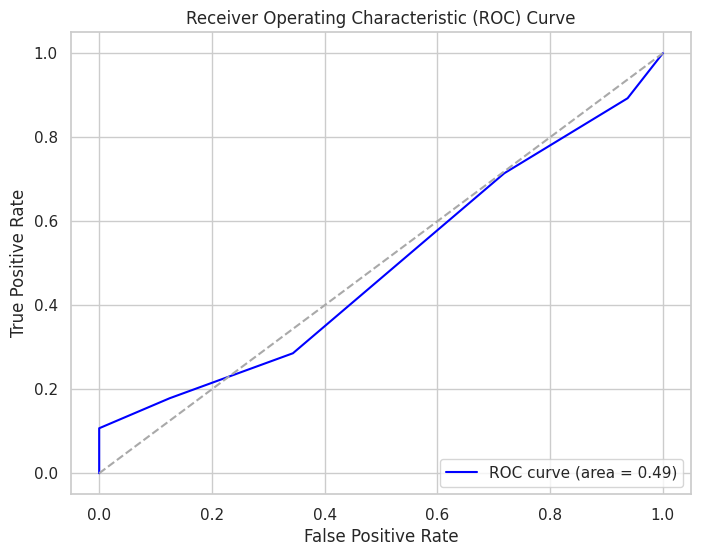

Accuracy: 0.48333333333333334
Precision: 0.42105263157894735
Recall: 0.2857142857142857
F1 Score: 0.3404255319148936
Matthews Correlation Coefficient: -0.06224158018602046


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'  # Replace with your file path
dengue_data = pd.read_csv(file_path)

# Preprocessing
features = dengue_data.drop(columns=['NS1'])
target = dengue_data['NS1']

numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(features)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, target, test_size=0.2, random_state=0)

# Train the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predictions
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')  # Adjust pos_label if needed
recall = recall_score(y_test, y_pred, pos_label='Positive')
f1 = f1_score(y_test, y_pred, pos_label='Positive')
mcc = matthews_corrcoef(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Positive')
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Printing Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)


# Extra Tree Classifier

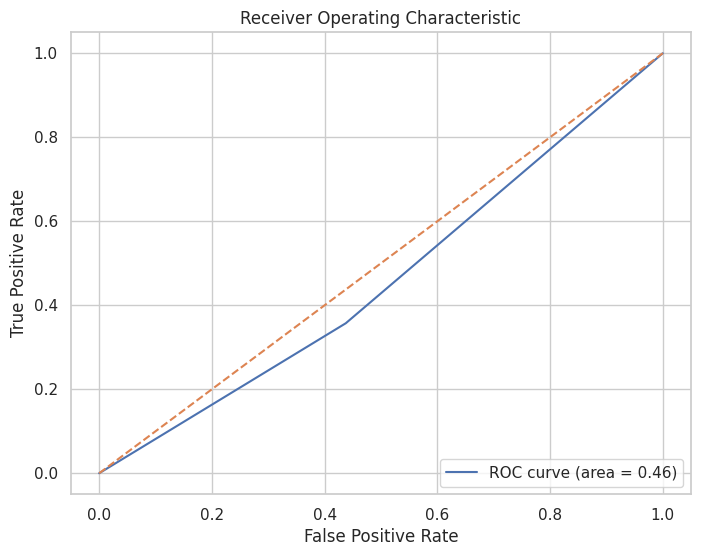

Accuracy: 0.4666666666666667
Precision: 0.4166666666666667
Recall: 0.35714285714285715
F1 Score: 0.3846153846153846
ROC AUC Score: 0.4598214285714286


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Load the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'  # Replace with your file path
dengue_data = pd.read_csv(file_path)

# Preprocessing
features = dengue_data.drop(columns=['NS1'])
target = dengue_data['NS1']

numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(features)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, target, test_size=0.2, random_state=0)

# Train the Extra Trees Classifier
extra_tree_model = ExtraTreeClassifier(random_state=0)
extra_tree_model.fit(X_train, y_train)

# Predictions
y_pred = extra_tree_model.predict(X_test)
y_pred_proba = extra_tree_model.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')  # Adjust pos_label if needed
recall = recall_score(y_test, y_pred, pos_label='Positive')
f1 = f1_score(y_test, y_pred, pos_label='Positive')
roc_auc = roc_auc_score(y_test, y_pred_proba)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='Positive')
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Printing Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


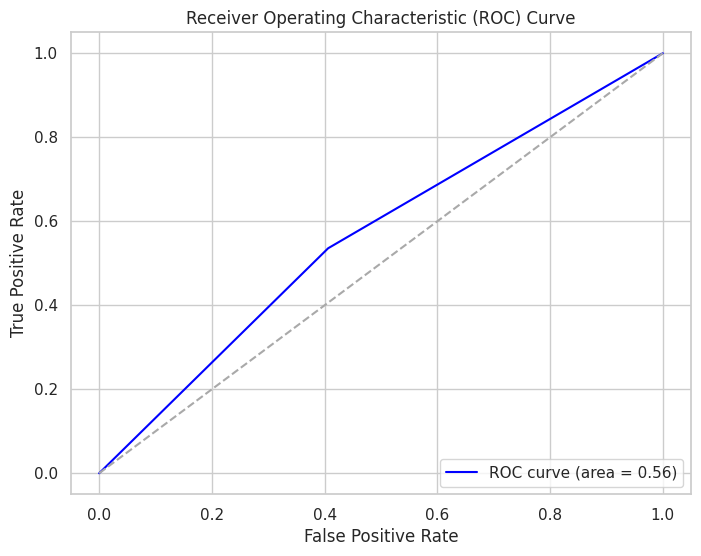

Accuracy: 0.5666666666666667
Precision: 0.5357142857142857
Recall: 0.5357142857142857
F1 Score: 0.5357142857142857
Matthews Correlation Coefficient: 0.12946428571428573


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'  # Replace with your file path
dengue_data = pd.read_csv(file_path)

# Preprocessing
features = dengue_data.drop(columns=[ 'NS1'])
target = dengue_data['NS1']

numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(features)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, target, test_size=0.2, random_state=0)

# Train the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=0)
decision_tree_model.fit(X_train, y_train)

# Predictions
y_pred = decision_tree_model.predict(X_test)
y_pred_proba = decision_tree_model.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')  # Adjust pos_label if needed
recall = recall_score(y_test, y_pred, pos_label='Positive')
f1 = f1_score(y_test, y_pred, pos_label='Positive')
mcc = matthews_corrcoef(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Positive')
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Printing Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)


# NuSVC

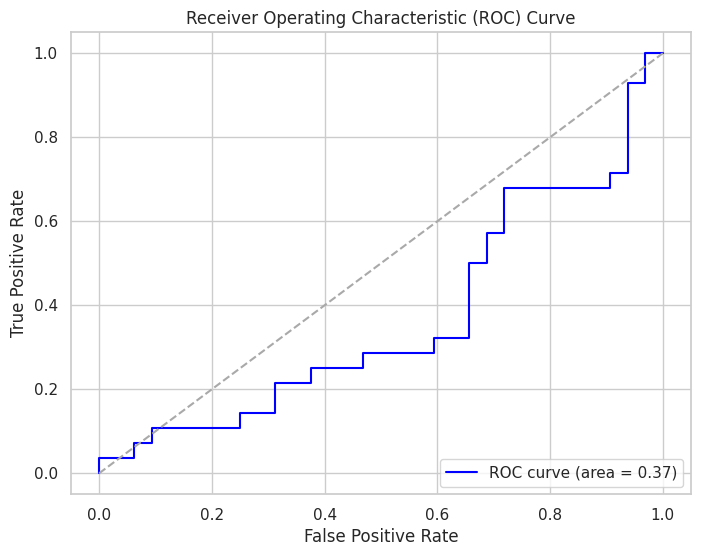

Accuracy: 0.55
Precision: 0.5294117647058824
Recall: 0.32142857142857145
F1 Score: 0.39999999999999997
Matthews Correlation Coefficient: 0.07908011290078078


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'  # Replace with your file path
dengue_data = pd.read_csv(file_path)

# Preprocessing
features = dengue_data.drop(columns=['NS1'])
target = dengue_data['NS1']

numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(features)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, target, test_size=0.2, random_state=0)

# Train the Nu-SVC model
nu_svc_model = NuSVC(probability=True, random_state=0)
nu_svc_model.fit(X_train, y_train)

# Predictions
y_pred = nu_svc_model.predict(X_test)
y_pred_proba = nu_svc_model.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')  # Adjust pos_label if needed
recall = recall_score(y_test, y_pred, pos_label='Positive')
f1 = f1_score(y_test, y_pred, pos_label='Positive')
mcc = matthews_corrcoef(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Positive')
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Printing Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
